________________________________________________________________________________________________________________

## Overview
________________________________________________________________________________________________________________


## Given a dataset on BigMart and their chain of supermarket outlets, use the product information and other outlet specific information to build a model that predicts Item_Outlet_Sales, the sales of a product in a particular store.
________________________________________________________________________________________________________________

### Item Identifier: A unique product ID.
### Item_Weight : The weight of a product.
### Item_Fat_Content: Whether the product is low or regular in fat.
### Item_Visibility: The percentage in display area being taken by this product.
### Item_Type: The category the product belongs to.
### Item_MRP: The maximum retail price that can be charged for a product.
### Outlet_Identifier: A unique outlet ID of which there are 10.
### Outlet_Establishment_Year: The year the store was established, the present year is 2013.
### Outlet_Size: The size of the outlet in terms of ground area.
### Outlet_Location_Type: The type of area the outlet is located in.
### Outlet_Type: The category the outlet belongs to.
### Item_Outlet_Sales: The sale revenue of a product in an outlet.
________________________________________________________________________________________________________________

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

data = pd.read_csv("../csv/dataset_2_martsales.csv")
data.shape

(8523, 12)

In [2]:
data.apply(lambda x: x.describe(), axis = 0)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
max,NaN,21.350000,NaN,0.328391,NaN,266.888400,NaN,2009.000000,NaN,NaN,NaN,13086.964800
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN


In [3]:
data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### Of the numerical values, Item_MRP has the only strong positive correlation to Item_Outlet_Sales at 0.567574.

### Notably, Item_Visibility has a small negative correlation of -0.128625 with Item_Outlet_Sales.

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


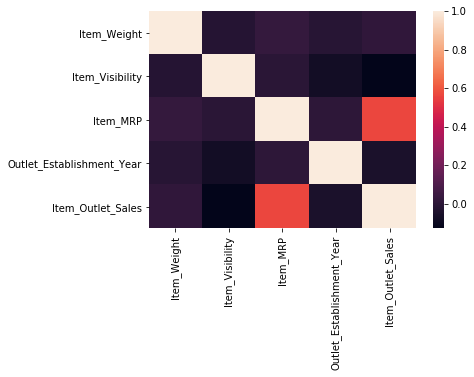

In [4]:
print(data.corr())
sb.heatmap(data.corr())

### Taking a look at missing values in the data we see that there are 2 categories which need to be addressed.

In [5]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Begin by filling in missing values for Item_Weight and Outlet_Size

________________________________________________________________________________________________________________
# Data Cleaning and Analysis
________________________________________________________________________________________________________________

## 1. Item_Weight

In [6]:
data.pivot_table(values = "Item_Weight", index = "Item_Identifier", aggfunc = "std").head(10)

,Item_Weight
Item_Identifier,
DRA12,0.0
DRA24,0.0
DRA59,0.0
DRB01,0.0
DRB13,0.0
DRB24,0.0
DRB25,0.0
DRB48,0.0
DRC01,0.0


### Looking at the standard deviations of the weights, clearly each Item_Identifier corresponds to a single weight, as it does to a single item.

### Fill missing values for Item_Weight based on the Item_Identifier. If missing, we will substitute the weight by the average of weight of the Item_Type the item is in as our second guess.

In [7]:
data_item_weight_missing = data[data["Item_Weight"].isnull()]
data_item_weight_present = data[data["Item_Weight"].isnull().apply(lambda x: not x)]
pivot_item_weight_present_mean_by_identifier = data_item_weight_present.pivot_table(values="Item_Weight", \
                                                                      index="Item_Identifier", aggfunc = 'mean')
pivot_item_weight_present_mean_by_type = data_item_weight_present.pivot_table(values="Item_Weight", \
                                                                      index="Item_Type", aggfunc = 'mean')

for index, row in data_item_weight_missing.iterrows():
    try:
        data.iloc[index,1] = pivot_item_weight_present_mean_by_identifier.loc[data.iloc[index,0]][0]
    except:
        data.iloc[index,1] = pivot_item_weight_present_mean_by_type.loc[data.iloc[index,4]][0]

## 2. Outlet_Size

### Three outlets are missing size indicators, we know the type of outlet each one is however.

In [8]:
data_outlet_size_missing = data[data["Outlet_Size"].isnull()]
data_outlet_size_present = data[data["Outlet_Size"].isnull().apply(lambda x: not x)]
pd.crosstab(data_outlet_size_missing["Outlet_Identifier"],data_outlet_size_missing["Outlet_Type"])

Outlet_Type,Grocery Store,Supermarket Type1
Outlet_Identifier,,
OUT010,555,0
OUT017,0,926
OUT045,0,929


In [9]:
pd.crosstab(data_outlet_size_present["Outlet_Size"],data_outlet_size_present["Outlet_Type"])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


### OUT010 will simply be mapped to Small since it is a Grocery Store, and the only other Grocery Store is small.

### Now to look into Supermarket Type1's distribution of size based on Location_Type

In [10]:
data_supermarket1 = data_outlet_size_present[data_outlet_size_present["Outlet_Type"]=="Supermarket Type1"]
pd.crosstab(data_supermarket1["Outlet_Size"],data_supermarket1["Outlet_Location_Type"])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,0
Small,930,930,0


In [11]:
pd.crosstab(data_outlet_size_missing["Outlet_Identifier"],data_outlet_size_missing["Outlet_Location_Type"])

Outlet_Location_Type,Tier 2,Tier 3
Outlet_Identifier,,
OUT010,0,555
OUT017,926,0
OUT045,929,0


### 2 of the 4 Supermarket Type 1's are categorized as Small. Additionally the missing values are from Tier 2 Locations, and the only Tier 2 Location Supermarket Type 1 is a Small one.

### Looking at sale figures does not give any hints to the Outlet_Size.

In [12]:
data.pivot_table(values = "Item_Outlet_Sales", index = ["Outlet_Type", "Outlet_Size"], aggfunc = 'mean')

Item_Outlet_Sales
Outlet_Type       Outlet_Size                   
Grocery Store     Small               340.329723
Supermarket Type1 High               2298.995256
                  Medium             2348.354635
                  Small              2358.343066
Supermarket Type2 Medium             1995.498739
Supermarket Type3 Medium             3694.038558

### We will categorize the OUT017 and OUT045 as Small keeping in mind there is some error introduced.

In [13]:
for index, row in data_outlet_size_missing.iterrows():
    data.iloc[index,8] = "Small"

In [14]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 3. Fat_Content

### The Fat_Content category contains redundant values.

In [15]:
pd.crosstab(data["Item_Fat_Content"], data["Item_Type"])

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
LF,20,8,2,17,24,22,39,8,29,54,10,11,4,31,28,9
Low Fat,301,126,39,314,382,424,580,199,481,840,159,156,32,645,339,72
Regular,306,108,67,297,258,387,577,0,0,0,248,0,27,485,70,59
low fat,8,6,0,10,12,4,11,7,10,16,1,2,1,16,7,1
reg,13,3,2,11,6,19,25,0,0,0,7,0,0,23,1,7


### Replace redundant values, and categorize certain items as Not Applicable due to their nature.

In [16]:
fat_content_replace = {"reg" : "Regular", "LF" : "Low Fat", "low fat" : "Low Fat", "Low Fat" : "Low Fat", \
                      "Regular" : "Regular"}

for index, row in data.iterrows():
    if data.iloc[index,4] in ["Health and Hygiene", "Household", "Others"]:
        data.iloc[index,2] = "Not Applicable"
    else:
        data.iloc[index,2] = fat_content_replace[data.iloc[index,2]]
        
pd.crosstab(data["Item_Fat_Content"], data["Item_Type"])

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,0,0,170,0,37,692,374,82
Not Applicable,0,0,0,0,0,0,0,0,520,910,0,169,0,0,0,0
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


## 4. Outlet_Establishment_Year, Outlet_Identifier, Outlet_Type, and Outlet_Location_Type

### Looking at the Item_Outlet_Sales with each outlet, there seem to be several products which produce outliers, perhaps a regressor which is more robust to outliers should be chosen.

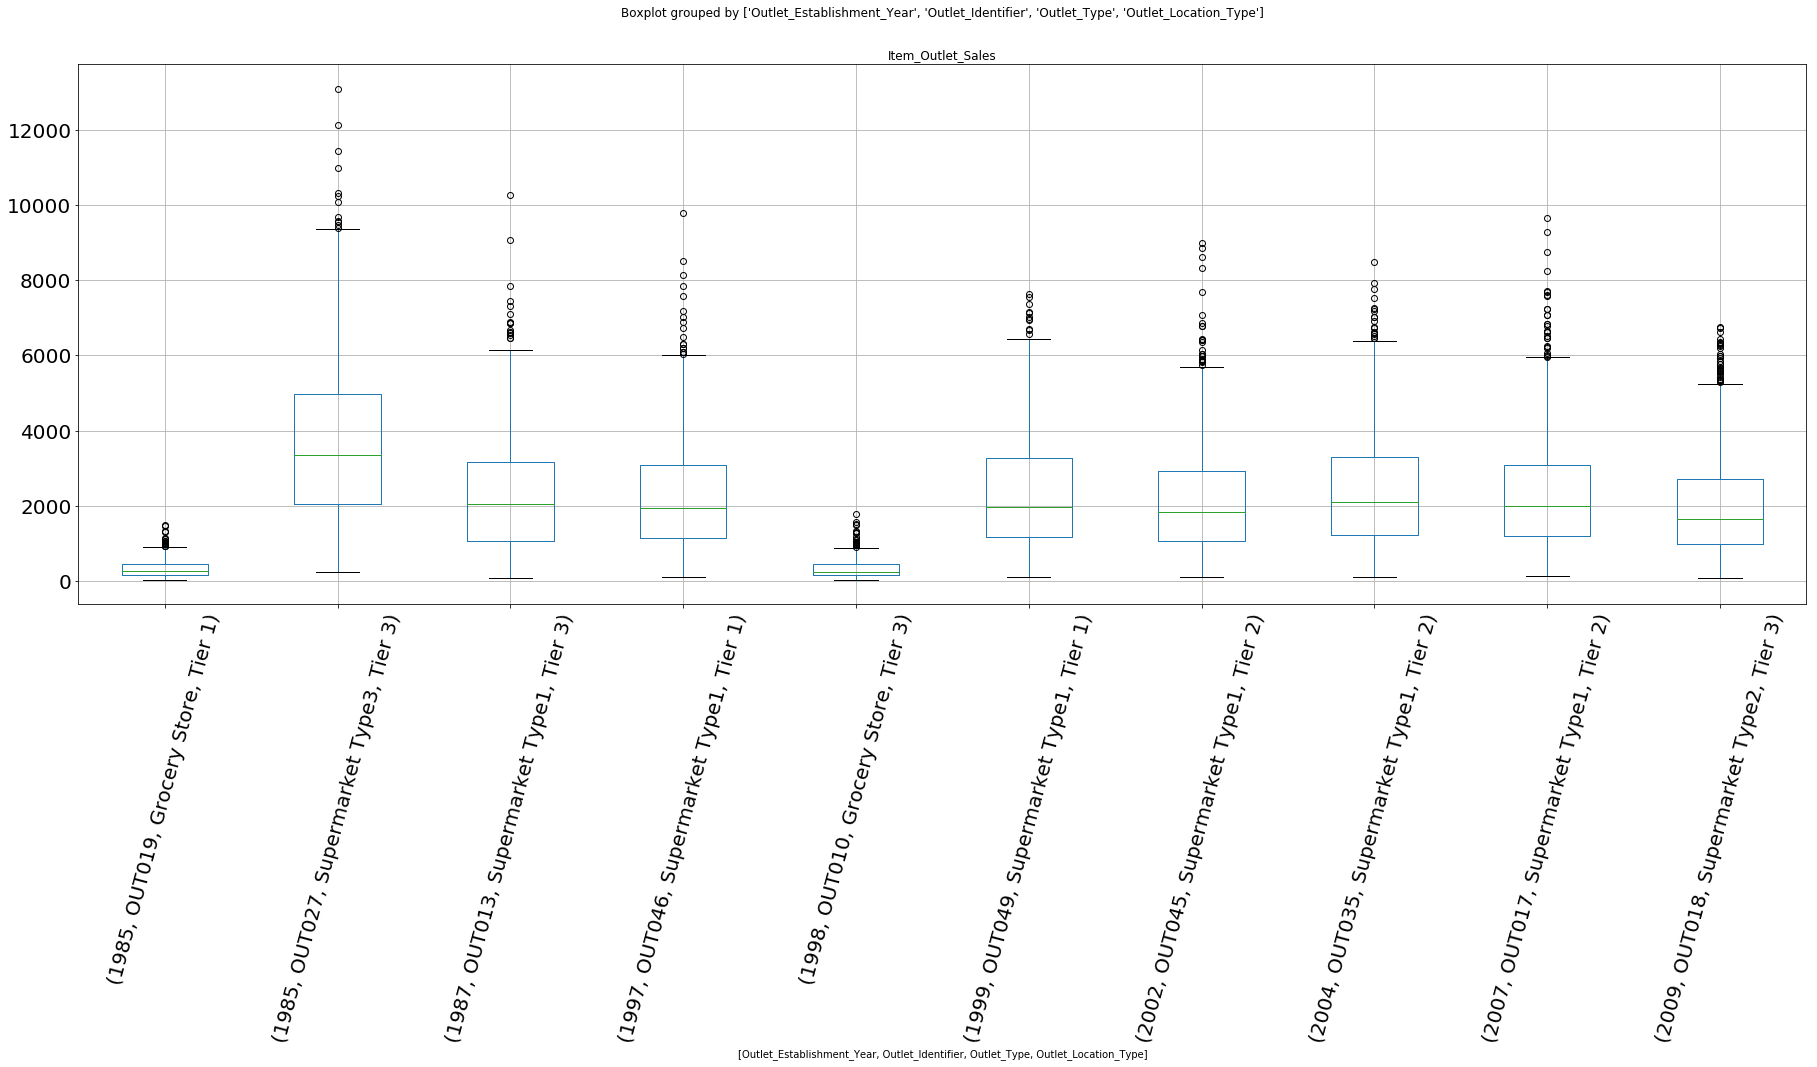

In [17]:
data.boxplot(column = "Item_Outlet_Sales", by = ["Outlet_Establishment_Year", "Outlet_Identifier", "Outlet_Type", "Outlet_Location_Type"], \
             figsize = (30,10), fontsize = 20, rot = 75)

### According to the distribution of individual item sales, it seems like Supermarket Type 1 and 2 perform about the same, while Grocery stores obviously underperform, and the Supermarket Type 3 performs very well.

### The establishment year does not seem to relate to the item sales, comparing across Supermarket Type 1, Type 2, and Grocery Stores. 

### We will create Outlet_Age by converting the establishment year to years since establishment to incorporate it into the model.

In [18]:
data["Outlet_Age"] = 2013-data["Outlet_Establishment_Year"]
data[["Outlet_Establishment_Year", "Outlet_Age"]].head()

,Outlet_Establishment_Year,Outlet_Age
0,1999,14
1,2009,4
2,1999,14
3,1998,15
4,1987,26


In [19]:
pd.crosstab(data["Outlet_Identifier"], data["Outlet_Size"])

Outlet_Size,High,Medium,Small
Outlet_Identifier,,,
OUT010,0,0,555
OUT013,932,0,0
OUT017,0,0,926
OUT018,0,928,0
OUT019,0,0,528
OUT027,0,935,0
OUT035,0,0,930
OUT045,0,0,929
OUT046,0,0,930


## 5. Item_Visibility

In [20]:
data["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

### There are some 0 Visibility in the stores that still produce sales.

In [21]:
data_item_visibility_is_0 = data[data["Item_Visibility"]==0]
data_item_visibility_is_0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.930,Not Applicable,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,14
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,4
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028,11
46,NCP05,19.600,Not Applicable,0.0,Health and Hygiene,153.3024,OUT045,2002,Small,Tier 2,Supermarket Type1,2428.8384,11
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.1872,4
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,Small,Tier 2,Supermarket Type1,4604.6728,11
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,Small,Tier 2,Supermarket Type1,5305.0944,11


In [22]:
data[data["Item_Identifier"]=="FDO23"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028,11
303,FDO23,17.85,Low Fat,0.147024,Breads,93.7436,OUT018,2009,Medium,Tier 3,Supermarket Type2,1134.5232,4
1054,FDO23,17.85,Low Fat,0.146400,Breads,93.8436,OUT035,2004,Small,Tier 2,Supermarket Type1,1418.1540,9
1324,FDO23,17.85,Low Fat,0.256375,Breads,94.8436,OUT019,1985,Small,Tier 1,Grocery Store,567.2616,28
1992,FDO23,17.85,Low Fat,0.147256,Breads,93.7436,OUT017,2007,Small,Tier 2,Supermarket Type1,1701.7848,6
2178,FDO23,17.85,Low Fat,0.146305,Breads,94.1436,OUT013,1987,High,Tier 3,Supermarket Type1,1607.2412,26
2264,FDO23,17.85,Low Fat,0.145718,Breads,94.3436,OUT027,1985,Medium,Tier 3,Supermarket Type3,2269.0464,28


### Taking a quick look at the visibilities of several items, one shown above, they are non-zero in some stores -- in which case they vary greatly between Outlet_Type.

### Take a look at the standard deviations for where the visibilities exist, grouped first by Outlet_Type, then by Item_Identifier.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C562C4898>]],
      dtype=object)

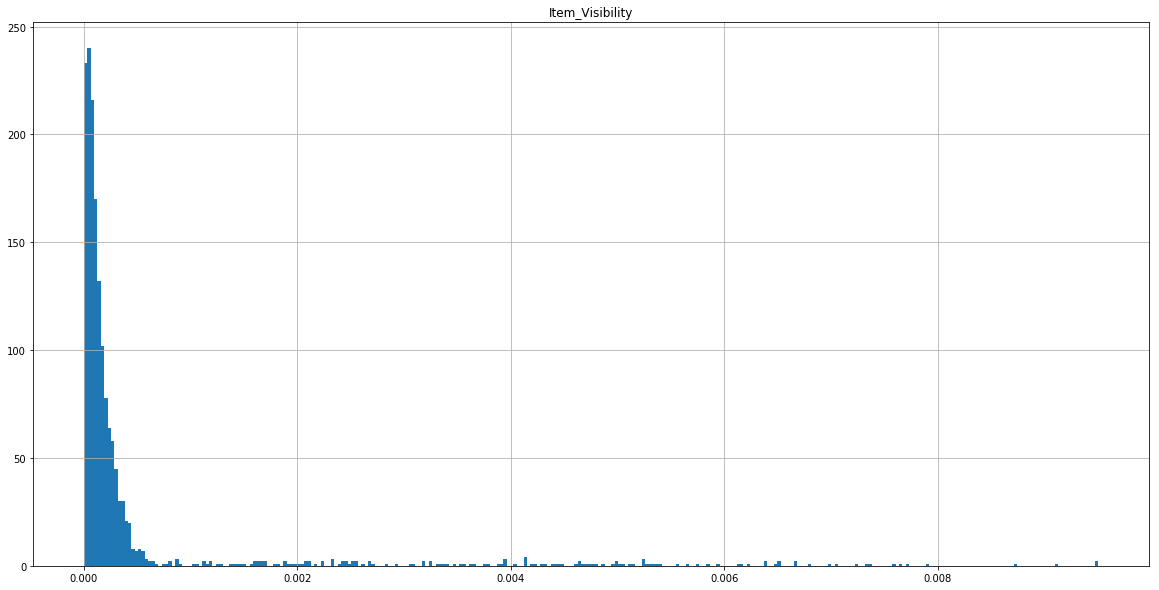

In [23]:
data_nonzero_item_visibility = data[data["Item_Visibility"]>0]
data_nonzero_item_visibility_pivot_std = data_nonzero_item_visibility.pivot_table(values = "Item_Visibility", \
                                            index = ["Outlet_Type", "Item_Identifier"], aggfunc = 'std')
data_nonzero_item_visibility_pivot_std.hist("Item_Visibility", bins=300, figsize = (20,10))

### Taking a look at the standard deviation of Item_Visibility but only by Item_Identifier we can see a greater variability.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C55D29F60>]],
      dtype=object)

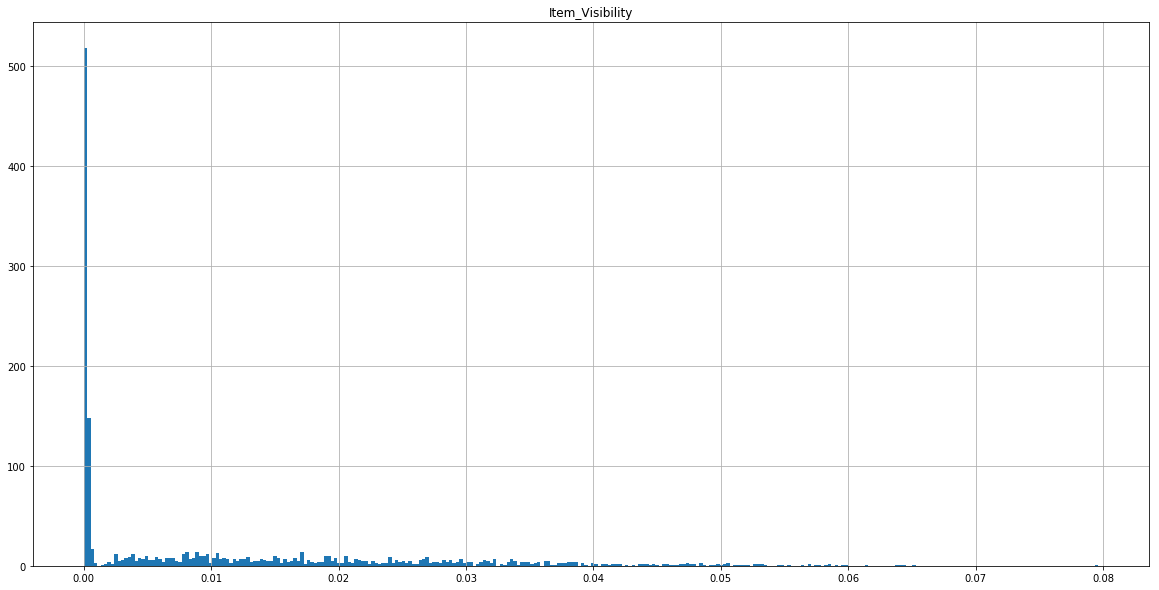

In [24]:
data_nonzero_item_visibility_only_id_pivot_std = data_nonzero_item_visibility.pivot_table(values = "Item_Visibility", \
                                            index = "Item_Identifier", aggfunc = 'std')
data_nonzero_item_visibility_only_id_pivot_std.hist("Item_Visibility", bins=300, figsize = (20,10))

### Since the variability for Item_Visibility with Outlet_Type and Item_Identifier is so low, we will impute their means wherever there are 0 values. 

### If there is only one instance of that Item_Identifier in that Outlet_Type and the Item_Visibility was 0, such that we cannot use the previous methodology to impute the visibility values, then use the mean of the Item_Type's Visibility to better reflect what kind of item is being displayed in that Outlet_Type. Again, there is greater error introduced in doing so.

In [25]:
data_nonzero_item_id_visibility_pivot_mean = data_nonzero_item_visibility.pivot_table(values = "Item_Visibility", \
                                            index = ["Outlet_Type", "Item_Identifier"], aggfunc = 'mean')
data_nonzero_item_type_visibility_pivot_mean = data_nonzero_item_visibility.pivot_table(values = "Item_Visibility", \
                                            index = ["Outlet_Type", "Item_Type"], aggfunc = 'mean')

for index, row in data_item_visibility_is_0.iterrows():
    try:
        data.iloc[index,3] = data_nonzero_item_id_visibility_pivot_mean.loc[row[10],row[0]][0]
    except:
        data.iloc[index,3] = data_nonzero_item_type_visibility_pivot_mean.loc[row[10],row[4]][0]

## 6. Item_MRP

### Taking a look at the distribution of Item_MRP we clearly see that it falls under four categories.

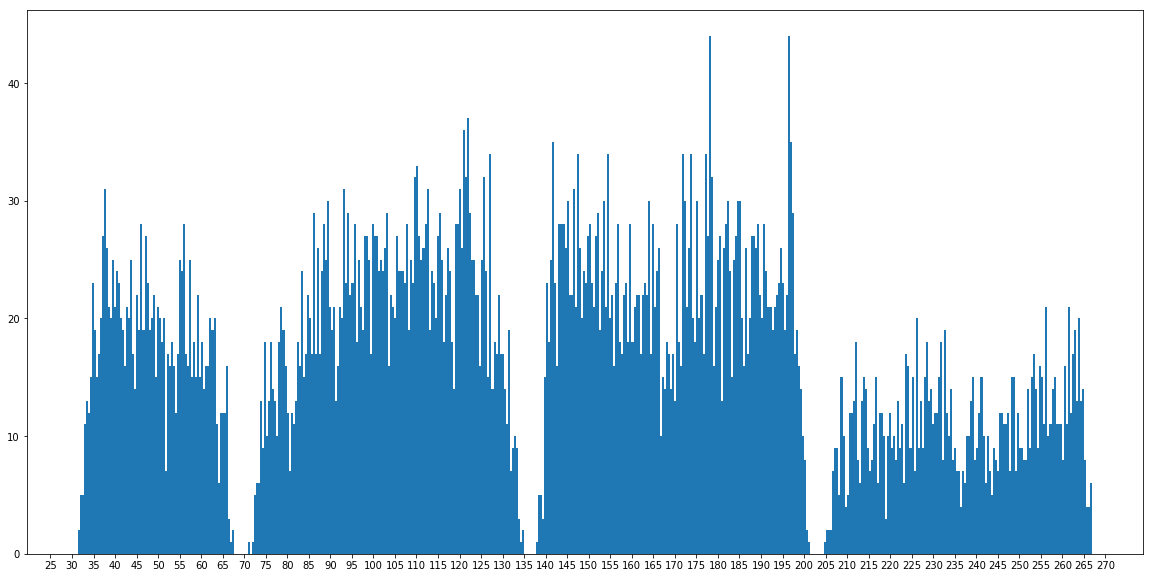

In [26]:
mrp = plt.figure(figsize = (20,10))
ax1 = mrp.add_subplot(1,1,1)
ax1.hist(data["Item_MRP"], bins = 500)
ax1.set_xticks(np.arange(25,275,5))
plt.show()

### We have the option to categorize them by magnitude, Low Medium High Extreme, if the model calls for it. Currently we have a really high correlation (+0.567574.) between the Item_MRP and our sales, a successful model will certainly incorporate it.

### A useful feature to look at may be the price to weight ratio as it relates to each item because it reflects a bit of the sentiment for purchasing. Therefore we will define PricePerWeight as Item_MRP divided by Item_Weight. Also to perhaps account for impulse purchases we will define PricePerVisibility in a similar way.

In [27]:
data["PricePerWeight"] = data["Item_MRP"]/data["Item_Weight"]
data["PricePerVisibility"] = data["Item_MRP"]/data["Item_Visibility"]

## 7. Categorical Variable Conversion

### Since we can not use these variables in our model we will produce dummy variables for each category.

In [28]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
PricePerWeight               float64
PricePerVisibility           float64
dtype: object

### Creating individual dummy variables for the 1,559 different Item_Identifiers and using them in our final model will certainly result in an overfitting. We may choose to create narrower categories for these items, but some of that information is contained in the Item_Type variable.

In [29]:
data = pd.get_dummies(data, columns=["Item_Fat_Content", "Item_Type",\
                                     "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,PricePerWeight,PricePerVisibility,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,14,26.861204,15567.053924,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,4,8.153581,2503.820893,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,14,8.092457,8449.723525,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.120401,182.0950,OUT010,1998,732.3800,15,9.484115,1512.408536,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,0.013217,53.8614,OUT013,1987,994.7052,26,6.031512,4075.264995,...,1,0,0,0,0,1,0,1,0,0


________________________________________________________________________________________________________________
# Building a Model
________________________________________________________________________________________________________________

In [30]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score

train = data

def evaluate_model(model, train_data, predictors, predict, KF = 10, reg_type = None):

    model.fit(train_data[predictors], train_data[predict])
    train_data_predictions = model.predict(train_data[predictors])
    cval = cross_val_score(model, train_data[predictors], train_data[predict], cv=KF, scoring='neg_mean_squared_error')
    cval = np.sqrt(np.abs(cval))
    print("===========================================================================================================")
    print("Root Mean Squared Error : ", np.sqrt(mse(train_data[predict],train_data_predictions)))
    print("Stratified %d-Fold Cross Validation : Mean = %g, Standard Deviation = %g, Range = (%g,%g)" % (KF, np.mean(cval), np.std(cval), np.min(cval), np.max(cval)))
    print("===========================================================================================================")
    
    if reg_type == "linear":
        coefficients = pd.Series(model.coef_, predictors).sort_values()
    elif reg_type == "tree":
        coefficients = pd.Series(model.feature_importances_, predictors).sort_values()
    coefficients.plot(kind = "bar", figsize = (30,20), fontsize = 25, grid = True)

________________________________________________________________________________________________________________

## 1. Linear Models:

### Linear Regression, we will note this model's score as a baseline for the performance of other models.

Root Mean Squared Error :  1127.6929833016495
Stratified 5-Fold Cross Validation : Mean = 1137.07, Standard Deviation = 12.3218, Range = (1115.55,1150.63)


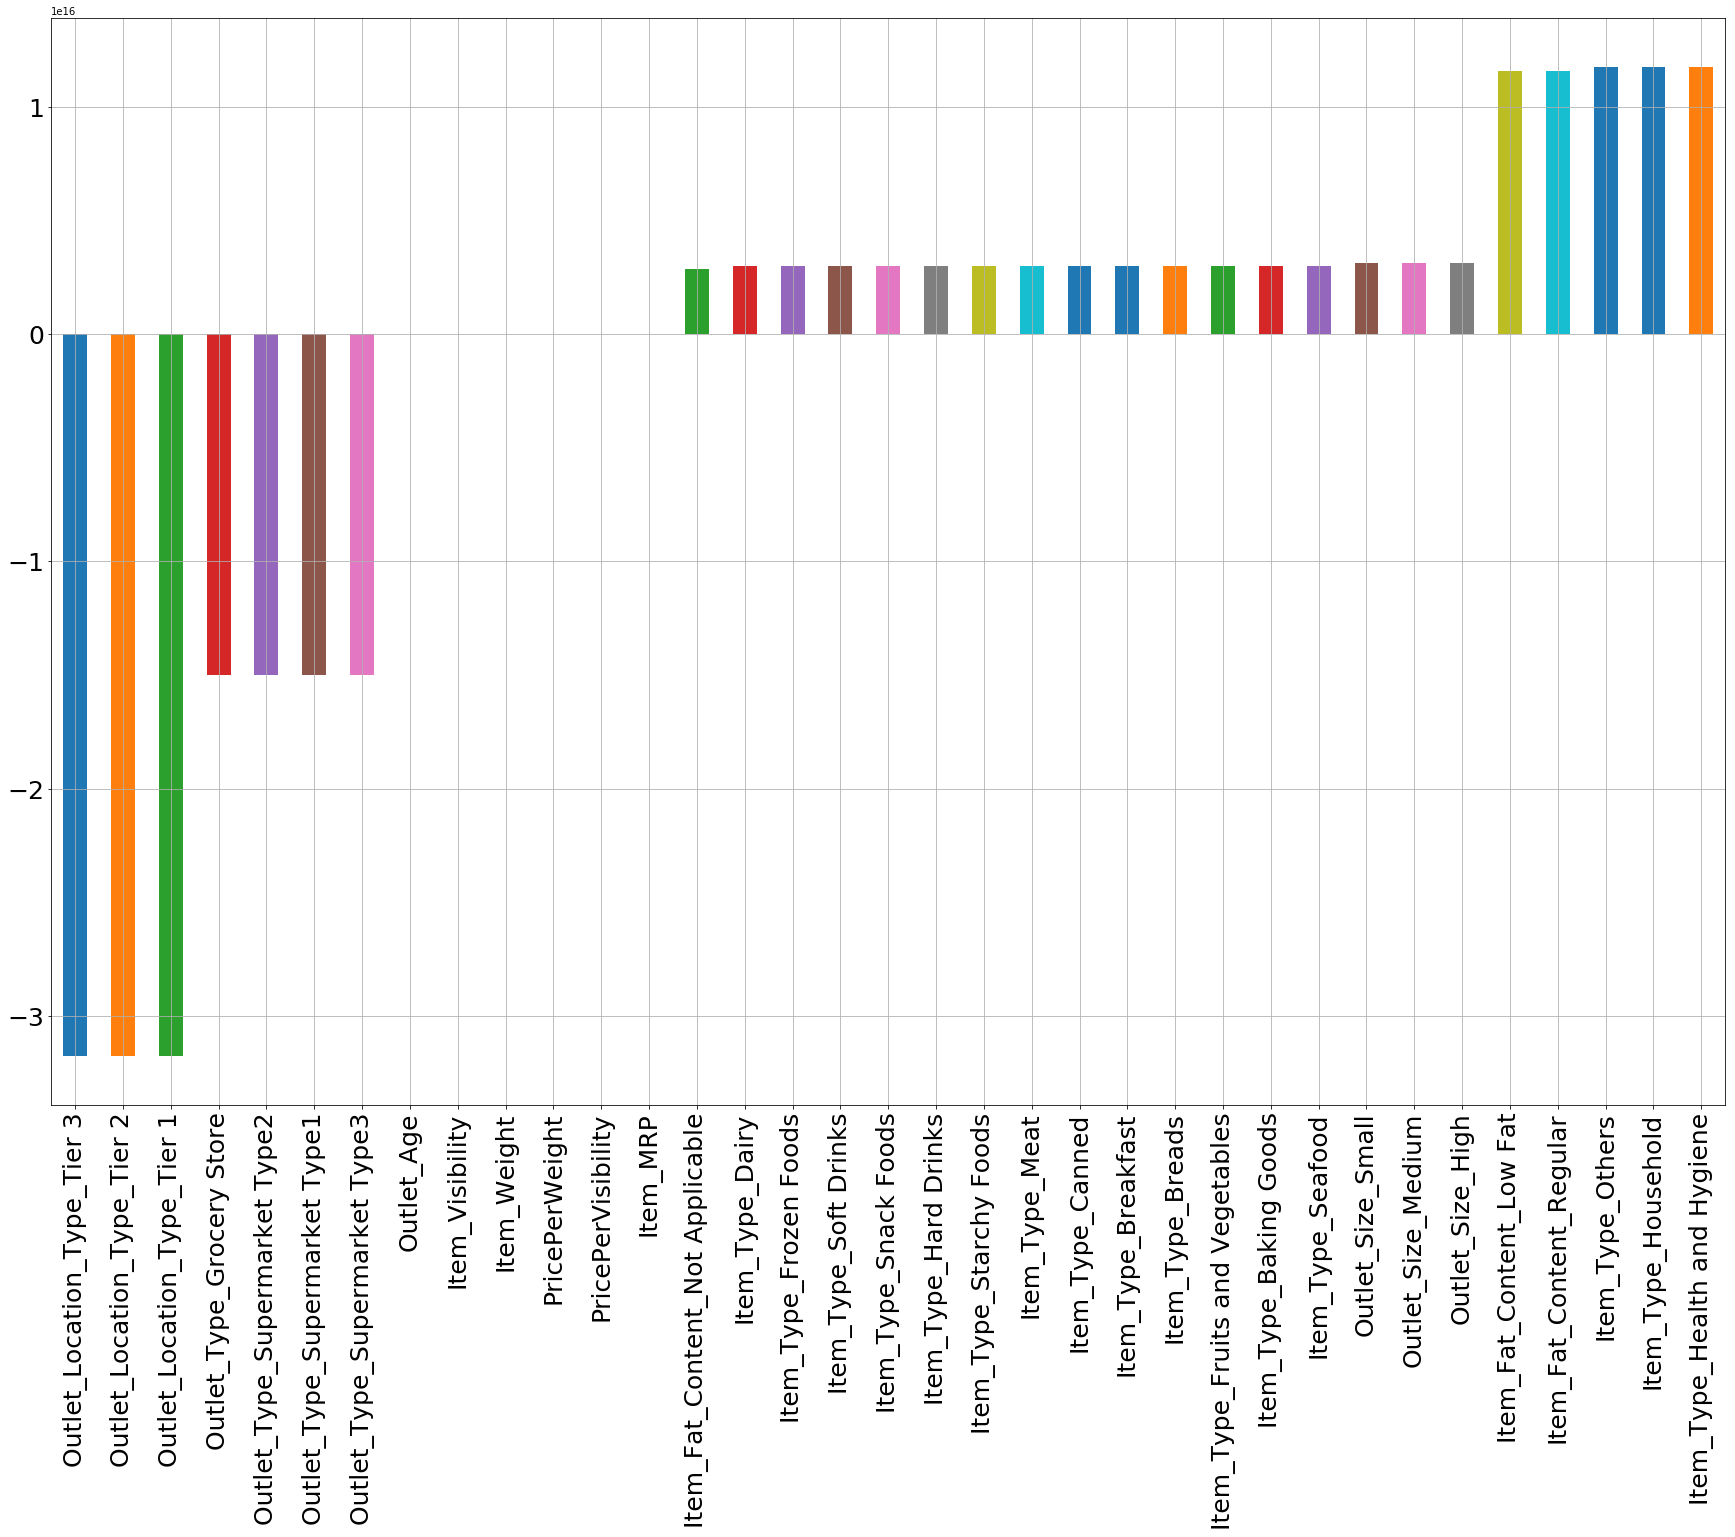

In [31]:
predict = "Item_Outlet_Sales"
exclude = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"]
predictors = [i for i in train.columns if i not in exclude]

from sklearn import linear_model

model = linear_model.LinearRegression(normalize = True)
evaluate_model(model, train, predictors, predict, KF = 5, reg_type = "linear")

### A Lasso Regression used to minimize potentially unwanted coefficient produces similiar results.

Root Mean Squared Error :  1128.2835201513312
Stratified 5-Fold Cross Validation : Mean = 1132.38, Standard Deviation = 13.372, Range = (1114.55,1151.62)


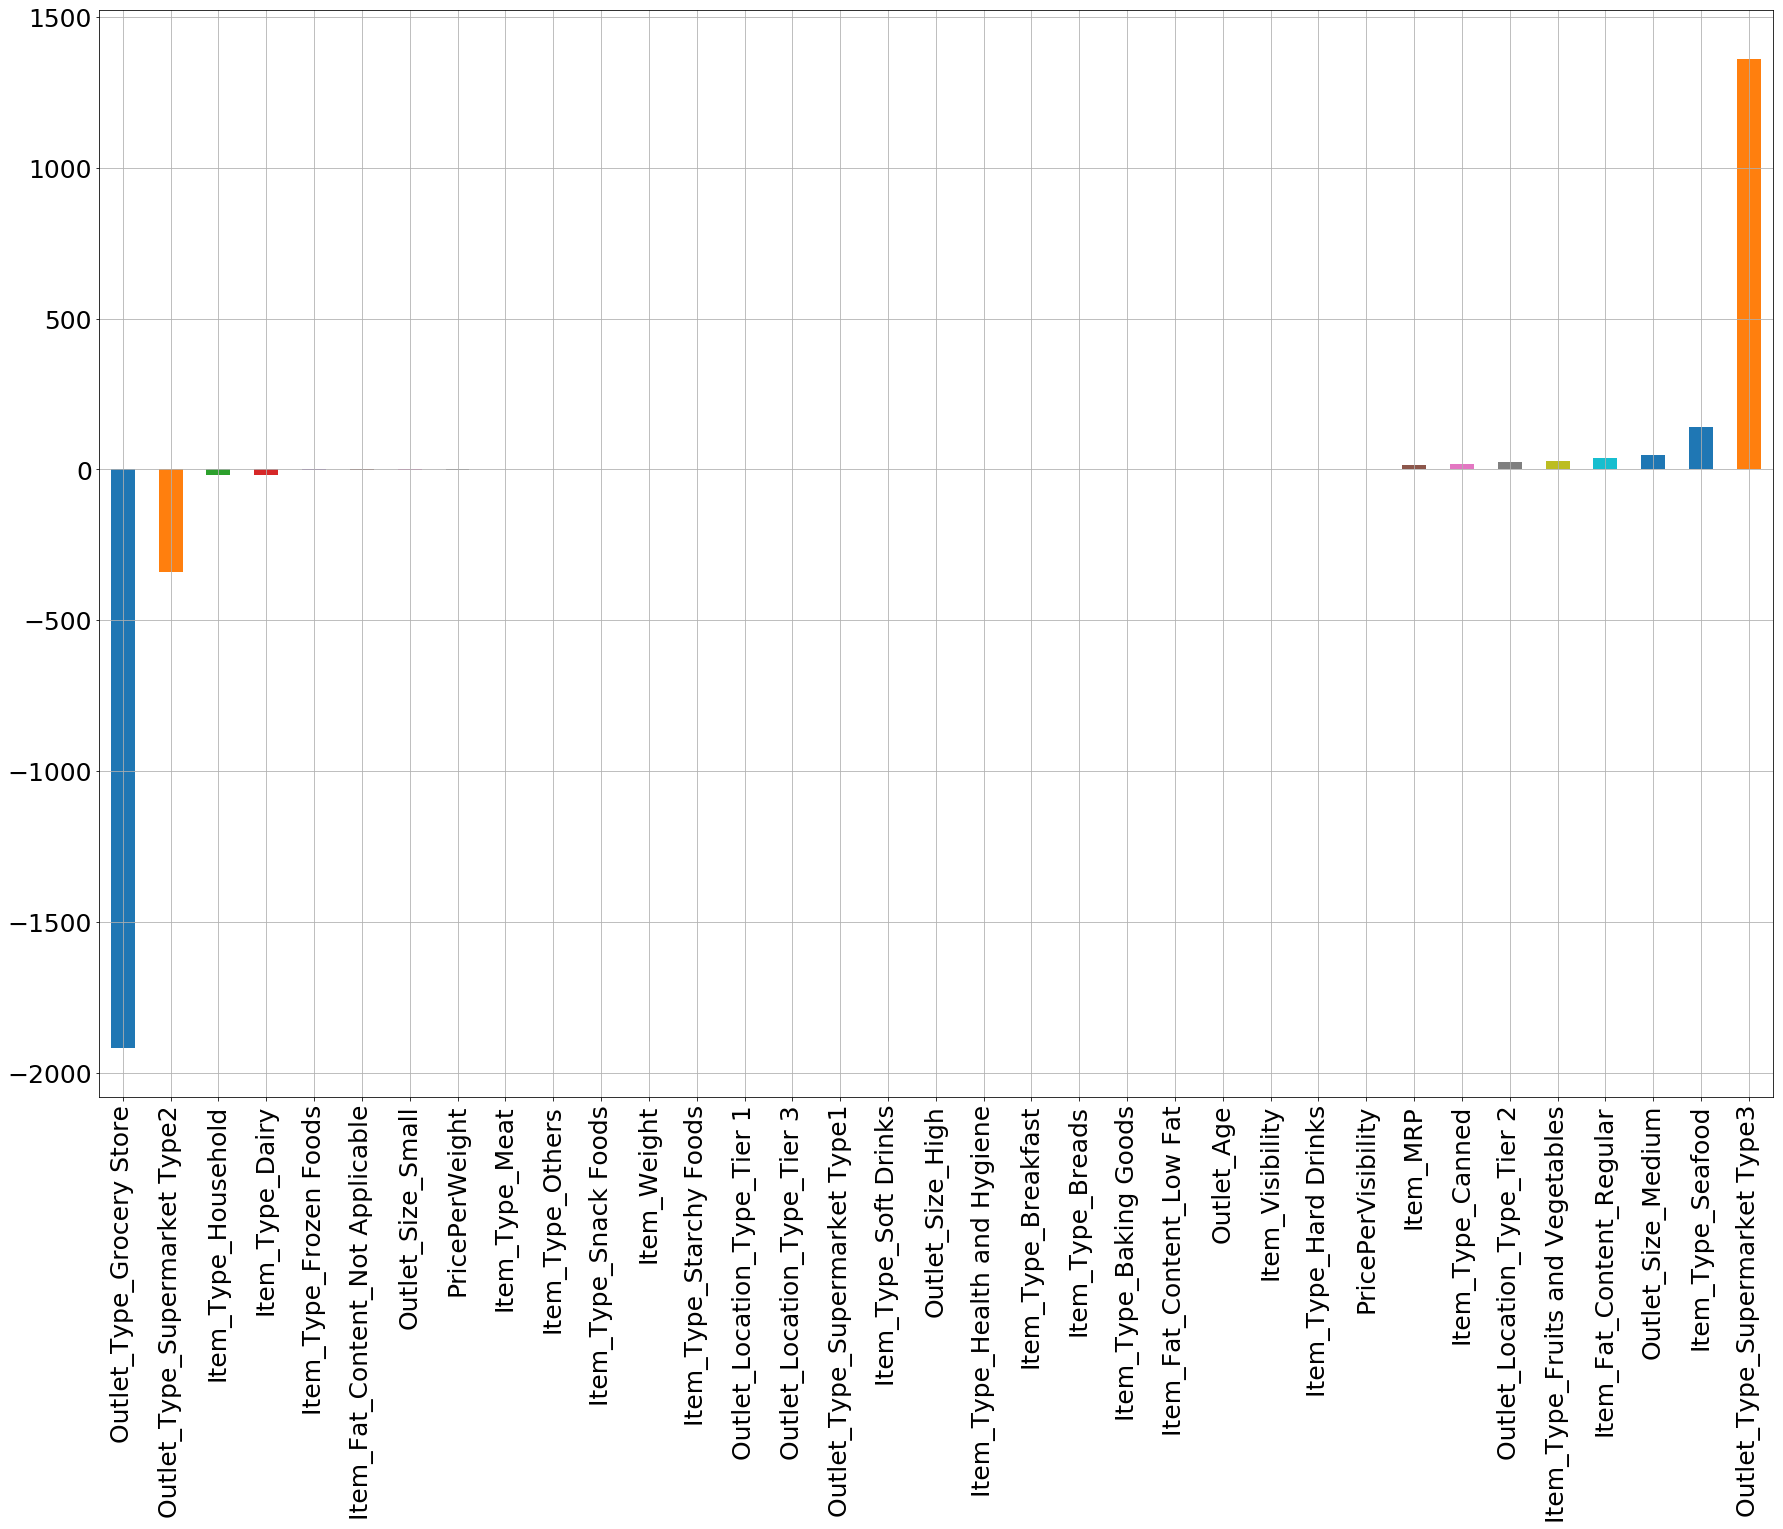

In [32]:
predict = "Item_Outlet_Sales"
exclude = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"]
predictors = [i for i in train.columns if i not in exclude]

from sklearn import linear_model

model = linear_model.Lasso(alpha = .05, normalize = True)
evaluate_model(model, train, predictors, predict, KF = 5, reg_type = "linear")

________________________________________________________________________________________________________________

## 2. Decision Tree and Random Forest Models

### A decision tree regressor model using grid search to evaluate hyperparameters produces a slightly better result than the linear regressors.

### With grid search we optimize iteritavely, if any parameter hits the end of the defined range, move the range that direction. Otherwise we refine the search locally until to exhaustion.

Root Mean Squared Error :  1074.4169286257577
Stratified 10-Fold Cross Validation : Mean = 1090.07, Standard Deviation = 20.5778, Range = (1055.82,1120.34)


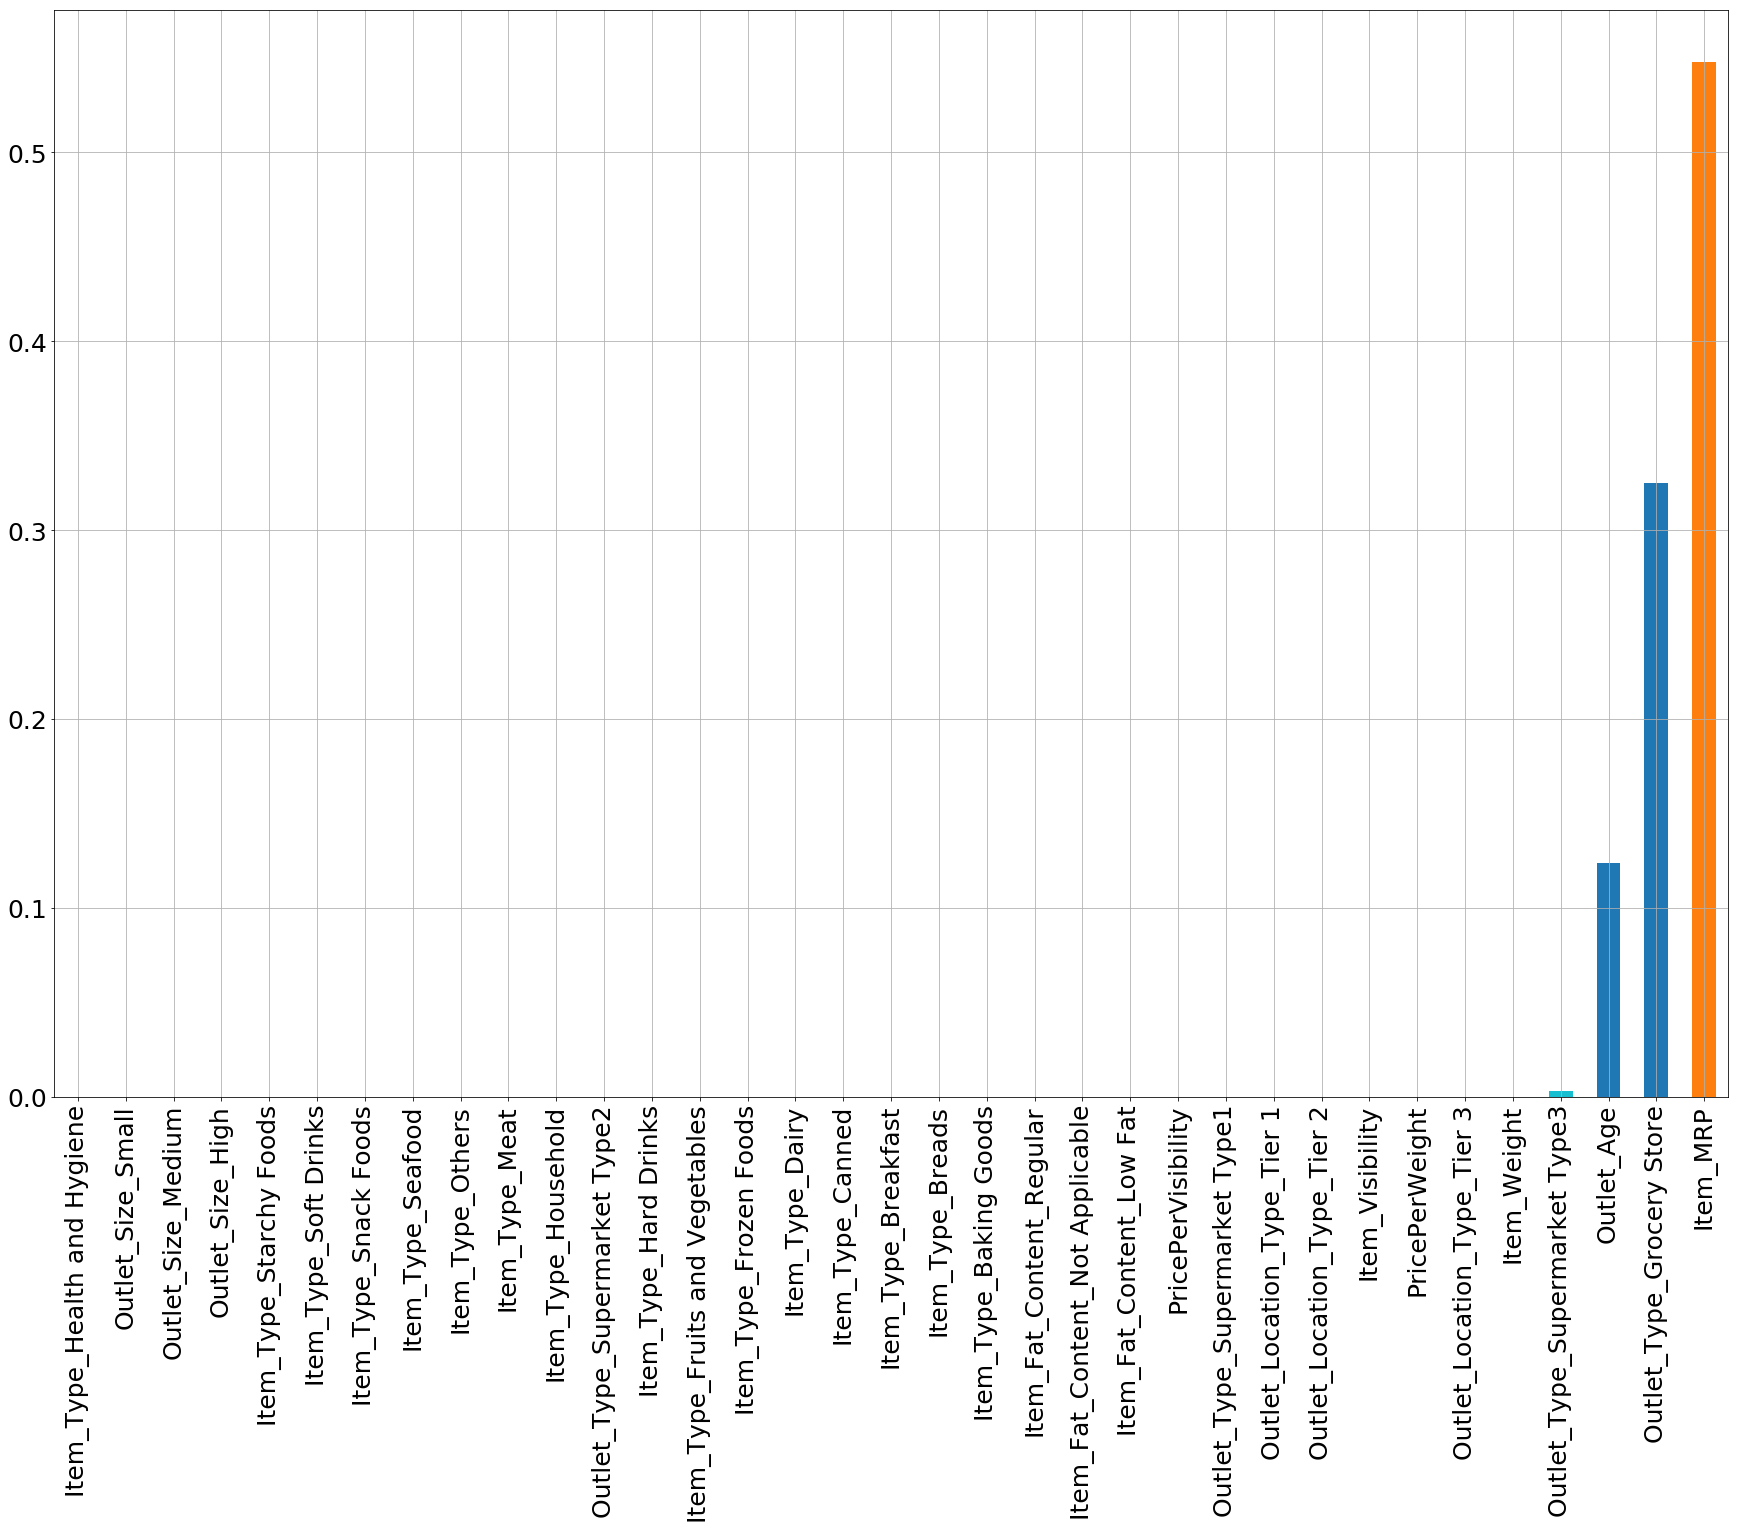

In [33]:
from sklearn.model_selection import GridSearchCV

predict = "Item_Outlet_Sales"
exclude = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"]
predictors = [i for i in train.columns if i not in exclude]

from sklearn import tree

parameters = [{"min_samples_split" : [2], \
               "max_depth" : [5], \
               "min_samples_leaf" : [54]}]
pfit = GridSearchCV(estimator=tree.DecisionTreeRegressor(), param_grid=parameters, n_jobs=-1)
pfit.fit(train[predictors], train[predict])

model = tree.DecisionTreeRegressor(min_samples_split = pfit.best_estimator_.min_samples_split, \
                                   max_depth=pfit.best_estimator_.max_depth, \
                                   min_samples_leaf=pfit.best_estimator_.min_samples_leaf)

evaluate_model(model, train, predictors, predict, KF = 10, reg_type = "tree")

### The following is a Random Forest Regressor using grid search which has expectedly better performance than the decision tree.

C:\Users\Spartaan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Root Mean Squared Error :  1060.6256443273794
Stratified 10-Fold Cross Validation : Mean = 1081.35, Standard Deviation = 19.1567, Range = (1048.02,1113.5)


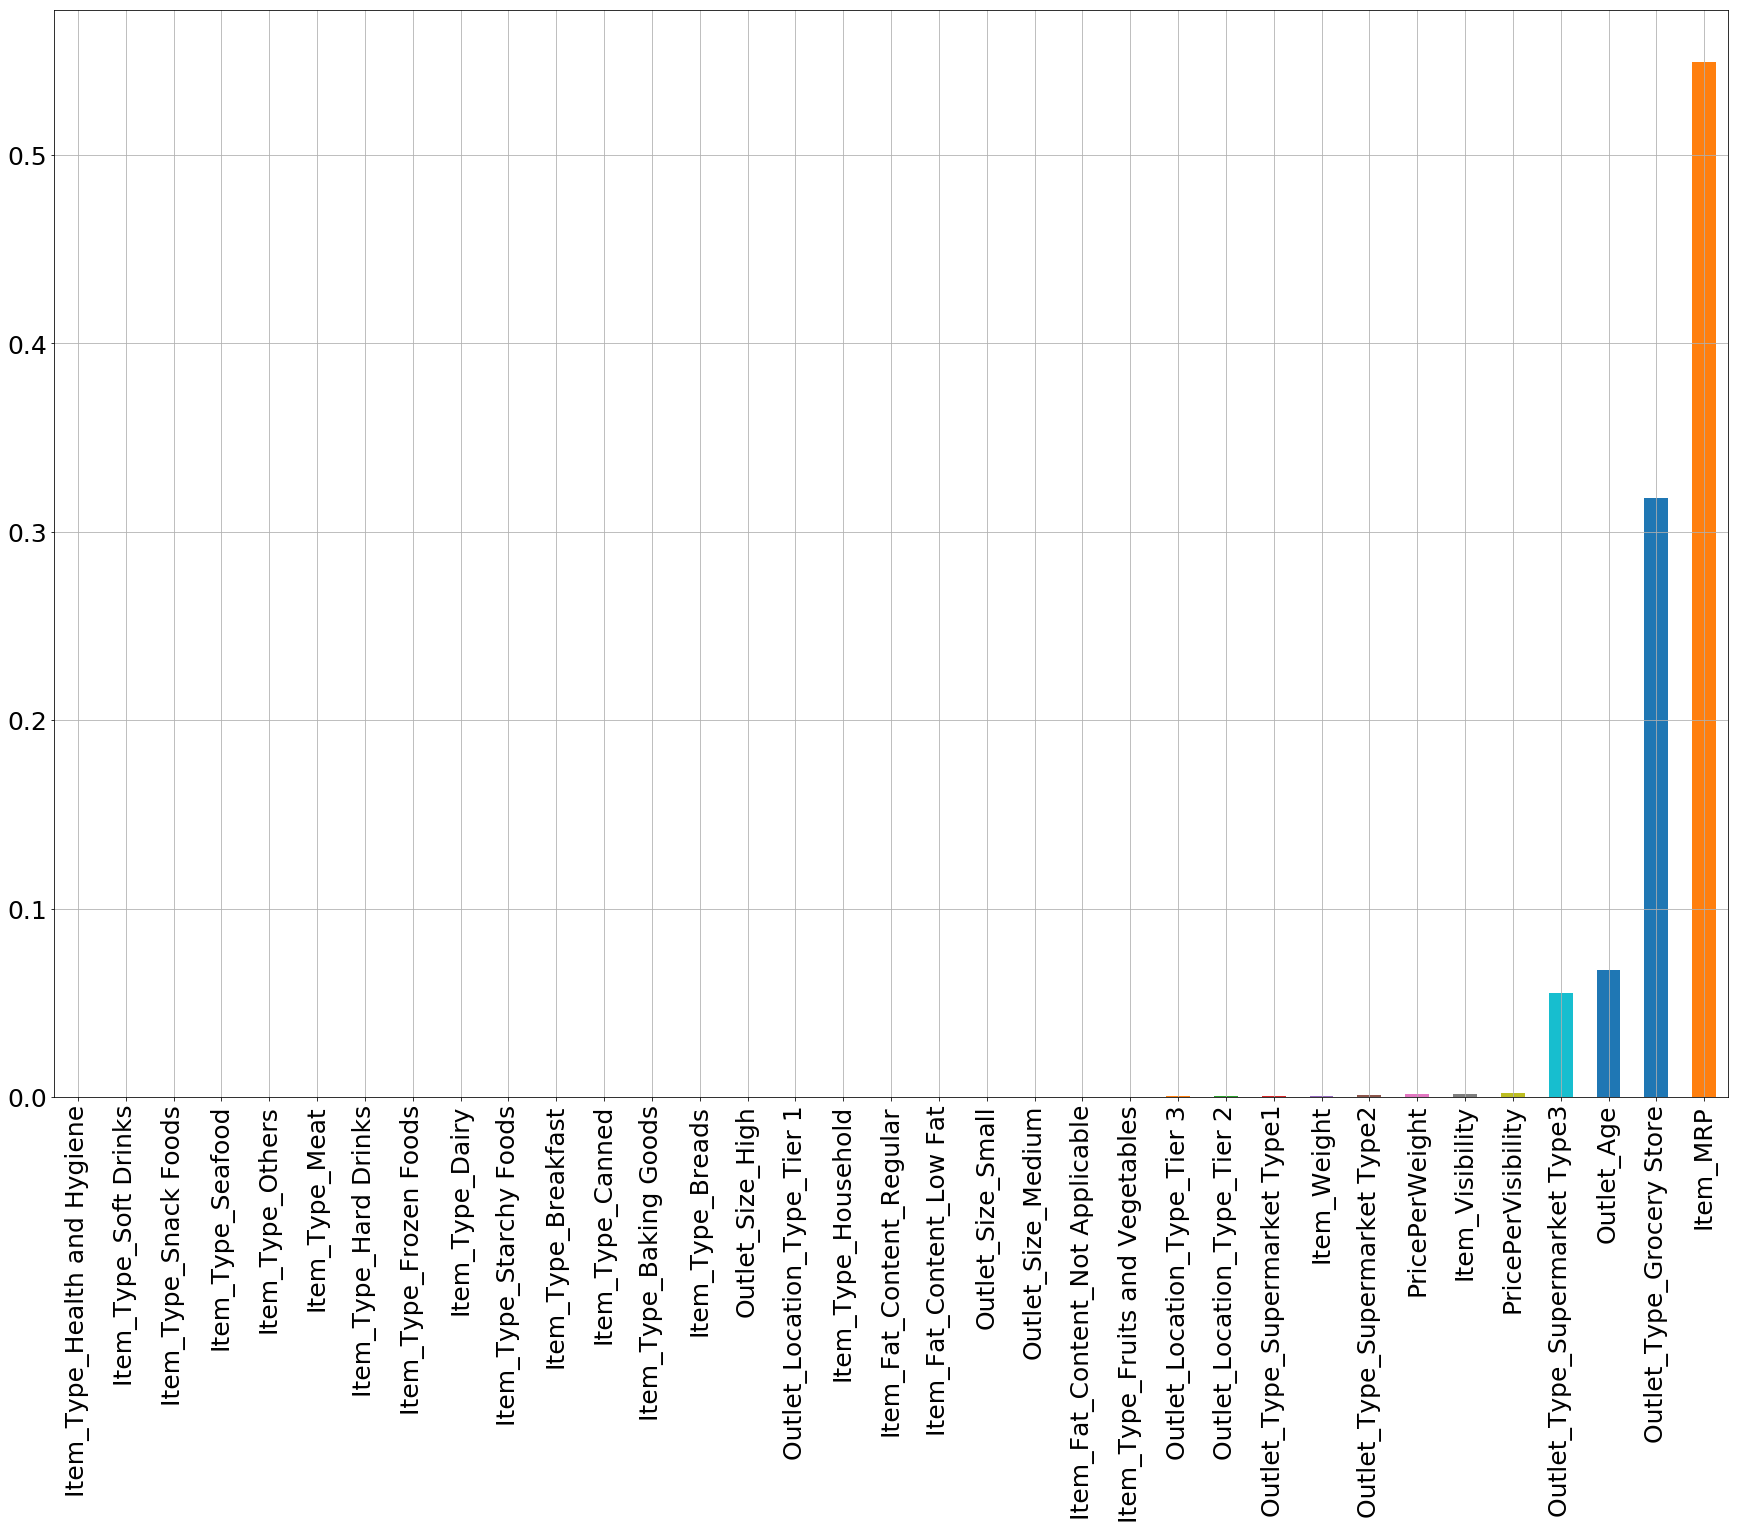

In [34]:
predict = "Item_Outlet_Sales"
exclude = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"]
predictors = [i for i in train.columns if i not in exclude]

from sklearn.ensemble import RandomForestRegressor

parameters = [{"min_samples_split" : [8], \
               "max_depth" : [6], \
               "min_samples_leaf" : [42], \
               "n_estimators" : [24]}]

pfit = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, n_jobs=-1)
pfit.fit(train[predictors], train[predict])
model = RandomForestRegressor(min_samples_split = pfit.best_estimator_.min_samples_split, \
                                       max_depth=pfit.best_estimator_.max_depth, \
                                       min_samples_leaf=pfit.best_estimator_.min_samples_leaf, \
                                       n_estimators = pfit.best_estimator_.n_estimators, \
                                       n_jobs = -1)

evaluate_model(model, train, predictors, predict, KF = 10, reg_type = "tree")

________________________________________________________________________________________________________________

## 3. Gradient Boosting Regressor

### Performing a similiar grid search procedure on the gradient boosting regressor we find roughly the same results as the random forests model.

Root Mean Squared Error :  1060.293038971997
Stratified 10-Fold Cross Validation : Mean = 1079.45, Standard Deviation = 18.1913, Range = (1053.48,1106.5)


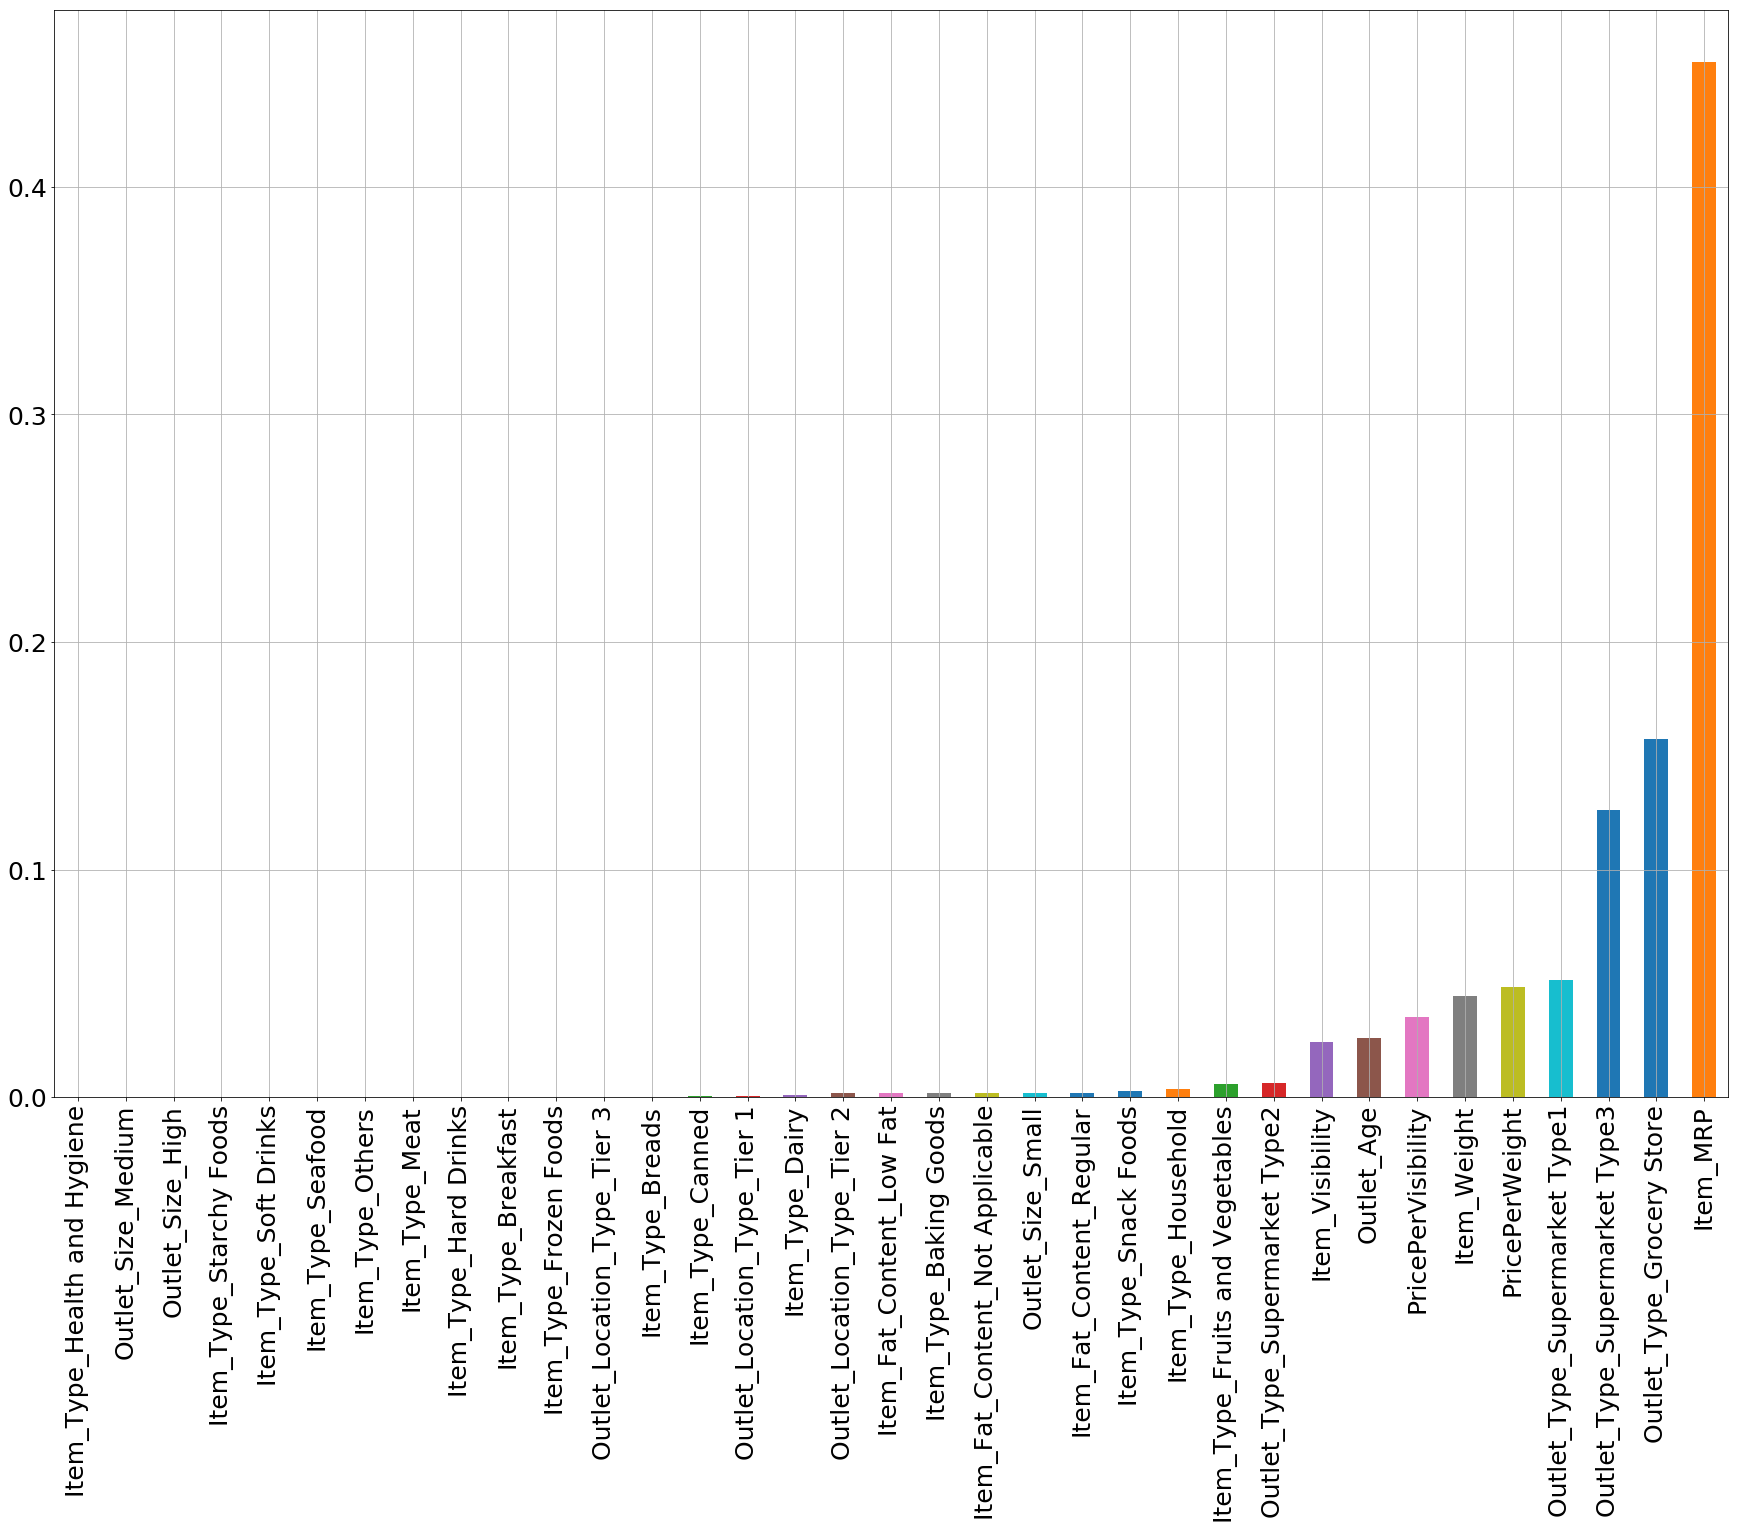

In [35]:
predict = "Item_Outlet_Sales"
exclude = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"]
predictors = [i for i in train.columns if i not in exclude]

from sklearn.ensemble import GradientBoostingRegressor

parameters = [{"loss" : ["ls"], \
               "n_estimators" : [90], \
               "min_samples_leaf" : [53], \
               "max_depth" : [3], \
               "min_samples_split" : [2], \
               "subsample" : [.82]}]

pfit = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=parameters, n_jobs=-1)
pfit.fit(train[predictors], train[predict])
model = GradientBoostingRegressor(loss = pfit.best_estimator_.loss, \
                                  n_estimators = pfit.best_estimator_.n_estimators, \
                                  min_samples_leaf = pfit.best_estimator_.min_samples_leaf, \
                                  max_depth = pfit.best_estimator_.max_depth, \
                                  learning_rate = .05,
                                  subsample = pfit.best_estimator_.subsample)

evaluate_model(model, train, predictors, predict, KF = 10, reg_type = "tree")

________________________________________________________________________________________________________________

## Conclusion

### Having tried various other linear and ensemble models in the Scipi-Learn package to fit this data, the 1,000 RMSE barrier seems to be the threshhold for this problem. Models which broke the barrier had a poor cross validation score indicating an overfitting.

### While the linear models were only able to detect the relevance of the outlet type being a grocery store or a supermarket type 3, clearly by the other models Item_MRP makes a difference in the sales total of an item. It was not obvious prior to this modelling that the age of the outlet was a relevant predictor in deciding the sales of an outlet. Taking a look back it does seem like the supermarket type 2, the youngest of all the outlets, is underperforming compared to its near age neighbor the supermarket type 1.

### The Gradient Boosting Regressor and the Random Forest model using a grid search to evaluate their parameters produces our best results at an RMSE score of about 1060 and a cross validation of 1080 (+- 18.5).

________________________________________________________________________________________________________________